# **MACHINE LEARNING INSIGHTS FOR PREDICTING ORAL DRUGS PROPERTIES**
##### LUCIANA OLIVEIRA & MARÍA URIBURU GRAY
###### 12/12/2024

## Dataset from Kaggle

###  Wikipedia Molecules Properties Dataset

    https://www.kaggle.com/datasets/thedevastator/wikipedia-molecules-properties-dataset

## 2. Exploratory Data Analysis

In [64]:
# Import Python libraries

    # Standard Libraries
import numpy as np
import pandas as pd
from scipy.stats import chi2

    # Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns   
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

    # Machine Learning and Data Processing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

    # Specialized Libraries
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol


In [65]:
# Read and import Dataset
df = pd.read_csv('../Molecular-properties-prediction-for-drug-discovery/dataset_molecules/cleaned_data_properties.csv')

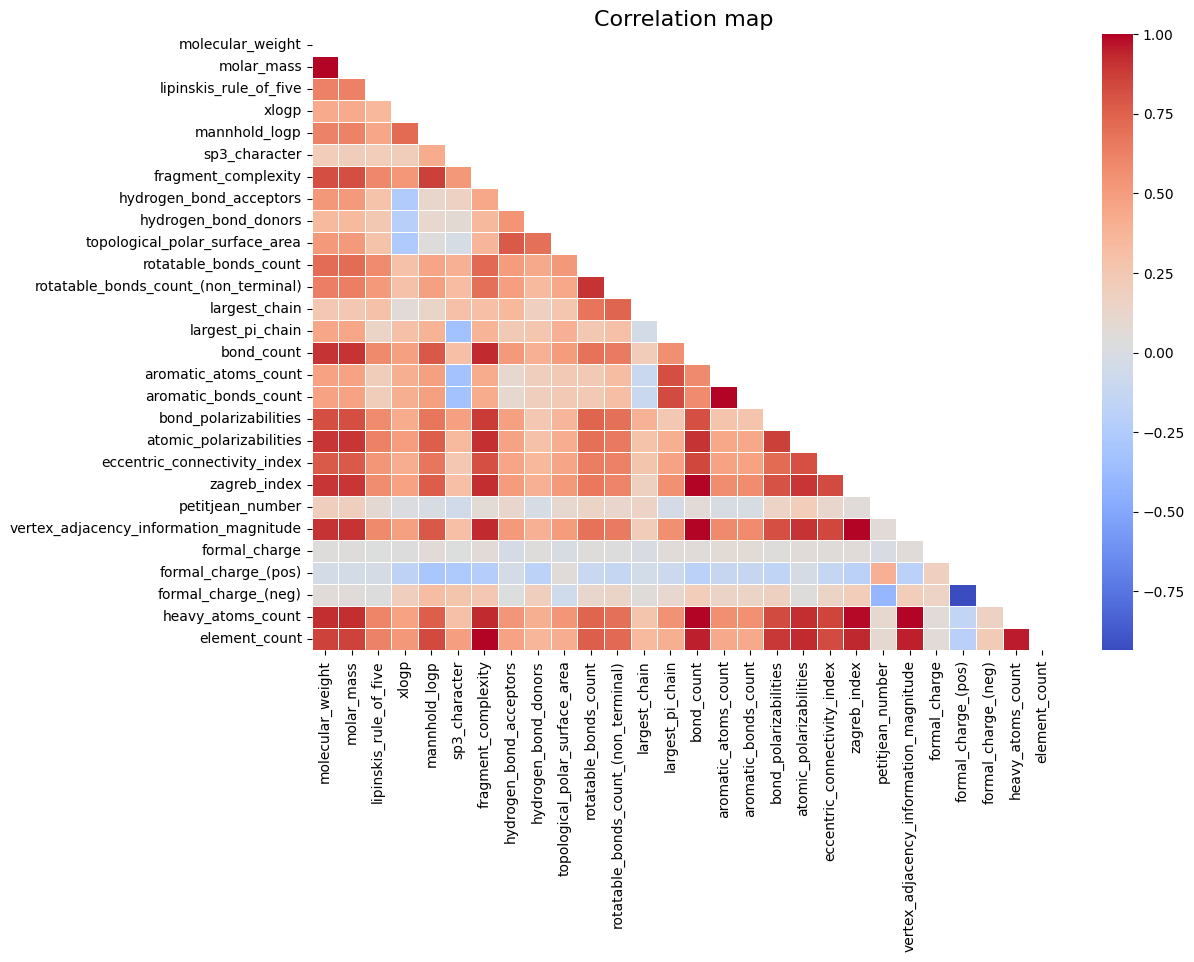

In [66]:
# Correlations map
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.drop(columns=['index'])

correlation_matrix = numeric_df.corr(method='spearman')

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation map", fontsize=16)
plt.show()

Cumple_Lipinski
True     11302
False     3823
Name: count, dtype: int64


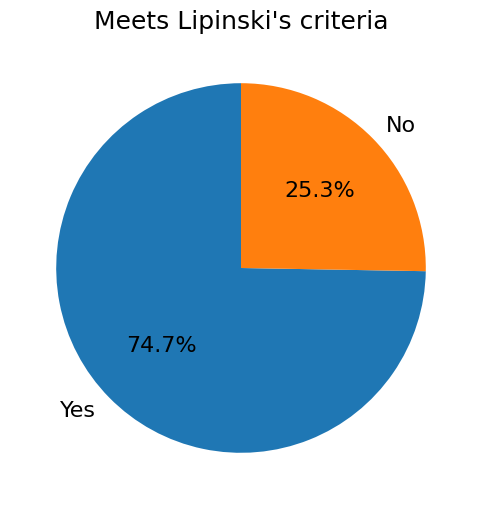

In [67]:
# Molecules that meet Lipinski's criteria
lipinski_filter = (
    (df["molecular_weight"] <= 500) &
    (df["hydrogen_bond_donors"] <= 5) &
    (df["hydrogen_bond_acceptors"] <= 10) &
    (df["xlogp"] <= 5)
)
df["Cumple_Lipinski"] = lipinski_filter
print(df["Cumple_Lipinski"].value_counts())

# Calcular los valores de cumplimiento
lipinski_counts = df["Cumple_Lipinski"].value_counts()
# Etiquetas para el gráfico
labels = ["Yes", "No"]
# Colores personalizados
colors = ["#1f77b4", "#ff7f0e"]
# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(lipinski_counts, labels=labels, autopct="%1.1f%%", startangle=90, colors=colors, textprops={'fontsize': 16})
plt.title("Meets Lipinski's criteria", fontsize=18)
plt.show()

In [68]:
# Drug structure: Methotextrate
df.iloc[443]

# SMILES id 443
smiles = df['smiles_molecule'][443]
mol = Chem.MolFromSmiles(smiles)

# 3D conformation using RDKit
mol_3d = Chem.AddHs(mol)  # Add explicit Hydrogens
AllChem.EmbedMolecule(mol_3d, AllChem.ETKDG())  # 3D conformation

# Convert the molecule to MOL format for Py3Dmol
block = Chem.MolToMolBlock(mol_3d)

# 3D Visualization with Py3Dmol
view = py3Dmol.view(width=800, height=400)  # Adjust window size
view.addModel(block, "mol")  # Load the MOL block
view.setStyle({'stick': {}})  # "Stick" style representation
view.zoomTo()  # Adjust zoom to display the entire molecule
view.show()

# Molecular formula and weight
df['molecular_formula'][443], df['molecular_weight'][443]

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

('C20H22N8O5', np.float64(454.171316))

In [69]:
# Drug structure: Acetylsalicylic acid
df.iloc[1]

# SMILES id 443
smiles = df['smiles_molecule'][1]
mol = Chem.MolFromSmiles(smiles)

# 3D conformation using RDKit
mol_3d = Chem.AddHs(mol)  # Add explicit Hydrogens
AllChem.EmbedMolecule(mol_3d, AllChem.ETKDG())  # 3D conformation

# Convert the molecule to MOL format for Py3Dmol
block = Chem.MolToMolBlock(mol_3d)

# 3D Visualization with Py3Dmol
view = py3Dmol.view(width=800, height=400)  # Adjust window size
view.addModel(block, "mol")  # Load the MOL block
view.setStyle({'stick': {}})  # "Stick" style representation
view.zoomTo()  # Adjust zoom to display the entire molecule
view.show()

# Molecular formula and weight
df['molecular_formula'][1], df['molecular_weight'][1]

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

('C9H8O4', np.float64(180.042259))

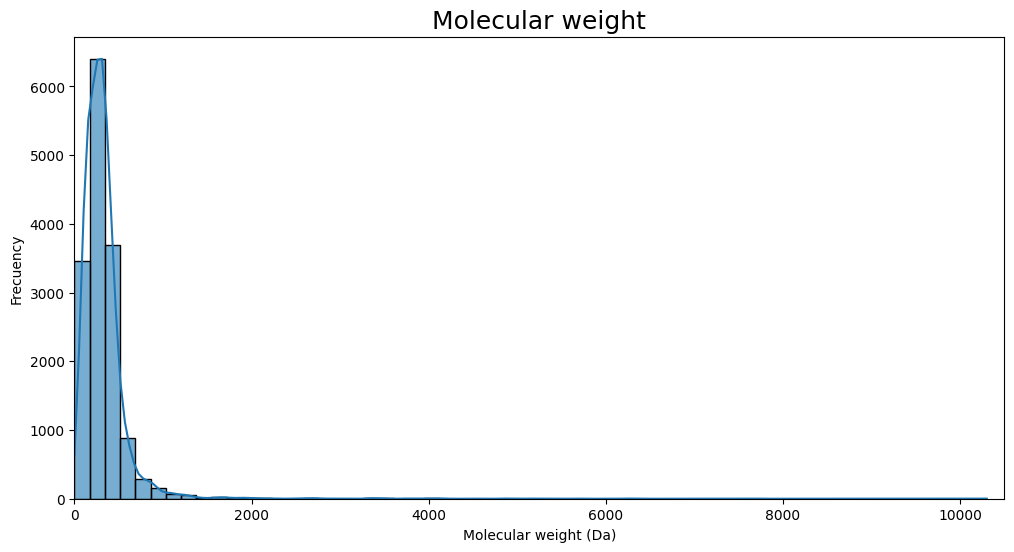

In [70]:
# Molecular weight histogram
plt.figure(figsize=(12, 6))
# Histogram
sns.histplot(
    df['molecular_weight'], 
    kde=True, 
    bins=60, 
    color='#1f77b4',  # Blue 
    alpha=0.6
)

plt.title('Molecular weight', fontsize=18)
plt.xlim(0, 10500)
plt.xlabel('Molecular weight (Da)')
plt.ylabel('Frecuency')
plt.show()

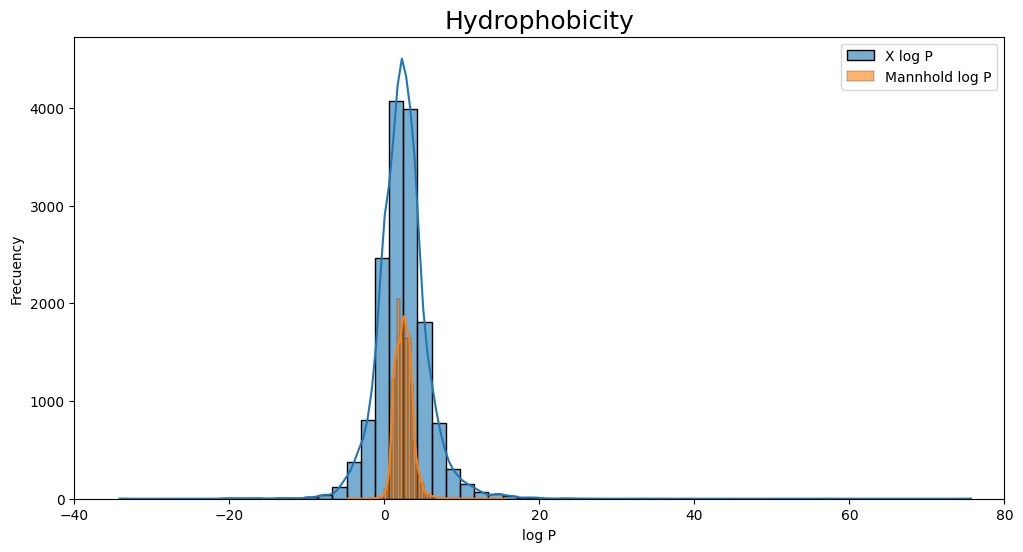

In [71]:
# Hydrophobicity histogram (XlogP & Mannhold logP)
plt.figure(figsize=(12, 6))
# Histogram 1
sns.histplot(
    df['xlogp'], 
    kde=True, 
    bins=60, 
    color='#1f77b4',  # Blue
    label='X log P', 
    alpha=0.6
)
# Histogram 2
sns.histplot(
    df['mannhold_logp'],  
    kde=True, 
    bins=60, 
    color='#ff7f0e',  # Orange
    label='Mannhold log P', 
    alpha=0.6
)

plt.legend()
plt.title('Hydrophobicity',  fontsize=18)
plt.xlabel('log P')
plt.xlim(-40, 80)
plt.ylabel('Frecuency')
plt.show()

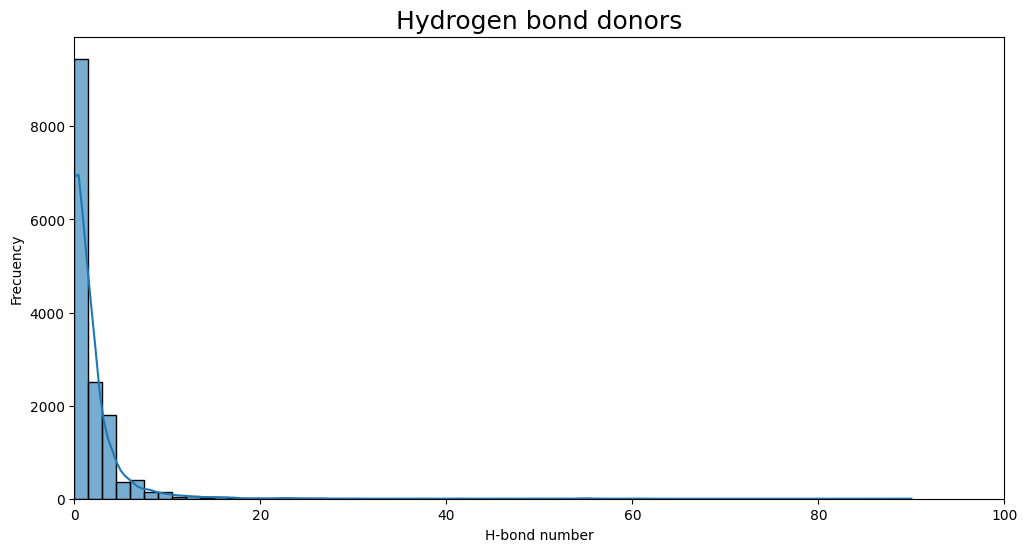

In [72]:
# H-bond donors histogram
plt.figure(figsize=(12, 6))
# Histogram
sns.histplot(
    df['hydrogen_bond_donors'], 
    kde=True, 
    bins=60, 
    color='#1f77b4',  # Blue
    label='x log P', 
    alpha=0.6
)

plt.title('Hydrogen bond donors',  fontsize=18)
plt.xlabel('H-bond number')
plt.xlim(0, 100)
plt.ylabel('Frecuency')
plt.show()

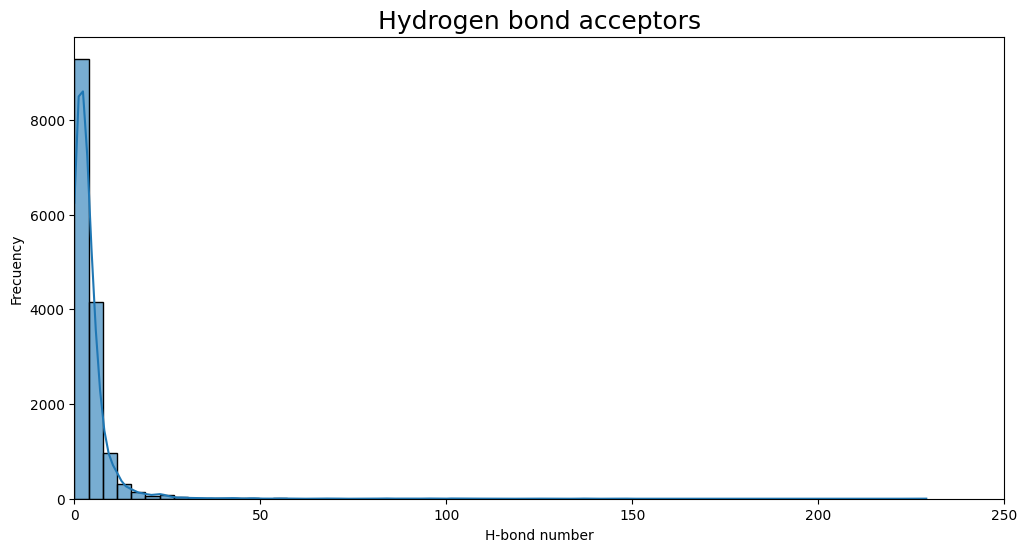

In [73]:
# H-bond acceptors histogram
plt.figure(figsize=(12, 6))
# Histogram
sns.histplot(
    df['hydrogen_bond_acceptors'], 
    kde=True, 
    bins=60, 
    color='#1f77b4',  # Blue
    label='x log P', 
    alpha=0.6
)

plt.title('Hydrogen bond acceptors', fontsize=18)
plt.xlabel('H-bond number')
plt.xlim(0, 250)
plt.ylabel('Frecuency')
plt.show()

In [74]:
# Molecular weight boxplot
fig = px.box(numeric_df, 
                x="molecular_weight",
                points="all",  
                color_discrete_sequence=["skyblue"])  

fig.update_traces(marker=dict(size=4, opacity=0.6, color="cornflowerblue"),  
                  line=dict(width=1.5))  
# Layout
fig.update_layout(
    xaxis_title="Molecular weight (Da)",
    yaxis_title="Frecuency", 
    xaxis=dict(range=[0, 4500], title_font=dict(size=14)),  
    yaxis=dict(showgrid=True), 
    plot_bgcolor="rgba(240,240,240,0.95)", 
    font=dict(size=12)  
)
fig.show()

In [75]:
# Molecules 3D structure

# SMILES id 6331
smiles = df['smiles_molecule'][6331]
mol = Chem.MolFromSmiles(smiles)

# 3D conformation using RDKit
mol_3d = Chem.AddHs(mol)  # Add explicit Hydrogens
AllChem.EmbedMolecule(mol_3d, AllChem.ETKDG())  # 3D conformation

# Convert the molecule to MOL format for Py3Dmol
block = Chem.MolToMolBlock(mol_3d)

# 3D Visualization with Py3Dmol
view = py3Dmol.view(width=800, height=400)  # Adjust window size
view.addModel(block, "mol")  # Load the MOL block
view.setStyle({'stick': {}})  # "Stick" style representation
view.zoomTo()  # Adjust zoom to display the entire molecule
view.show()

# Molecular formula and weight
df['molecular_formula'][6331], df['molecular_weight'][6331]

[20:22:12] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[20:22:12] UFFTYPER: Unrecognized charge state for atom: 0
[20:22:12] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[20:22:12] UFFTYPER: Unrecognized charge state for atom: 0
[20:22:12] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[20:22:12] UFFTYPER: Unrecognized charge state for atom: 0
[20:22:12] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[20:22:12] UFFTYPER: Unrecognized charge state for atom: 0
[20:22:12] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[20:22:12] UFFTYPER: Unrecognized charge state for atom: 0
[20:22:12] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[20:22:12] UFFTYPER: Unrecognized charge state for atom: 0
[20:22:12] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[20:22:12] UFFTYPER: Unrecognized charge state for atom: 0
[20:22:12] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[20:22:12] UFFTYPER: Unrecognized charge state for atom: 0


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

('C216H228F72N12O30P12', np.float64(5209.238605))

In [76]:
# Molecules 3D structure

# SMILES id 12110
smiles = df['smiles_molecule'][12110]
mol = Chem.MolFromSmiles(smiles)

# 3D conformation using RDKit
mol_3d = Chem.AddHs(mol)  # Add explicit Hydrogens
AllChem.EmbedMolecule(mol_3d, AllChem.ETKDG())  # 3D conformation

# Convert the molecule to MOL format for Py3Dmol
block = Chem.MolToMolBlock(mol_3d)

# 3D Visualization with Py3Dmol
view = py3Dmol.view(width=800, height=400)  # Adjust window size
view.addModel(block, "mol")  # Load the MOL block
view.setStyle({'stick': {}})  # "Stick" style representation
view.zoomTo()  # Adjust zoom to display the entire molecule
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [77]:
# Molecules 3D structure

# SMILES id 7752
smiles = df['smiles_molecule'][7752]
mol = Chem.MolFromSmiles(smiles)

# 3D conformation using RDKit
mol_3d = Chem.AddHs(mol)  # Add explicit Hydrogens
AllChem.EmbedMolecule(mol_3d, AllChem.ETKDG())  # 3D conformation

# Convert the molecule to MOL format for Py3Dmol
block = Chem.MolToMolBlock(mol_3d)

# 3D Visualization with Py3Dmol
view = py3Dmol.view(width=800, height=400)  # Adjust window size
view.addModel(block, "mol")  # Load the MOL block
view.setStyle({'stick': {}})  # "Stick" style representation
view.zoomTo()  # Adjust zoom to display the entire molecule
view.show()

# Molecular formula and weight
df['molecular_formula'][7752], df['molecular_weight'][7752]

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

('C230H305N67Na19O122P19S19', np.float64(7589.748613))

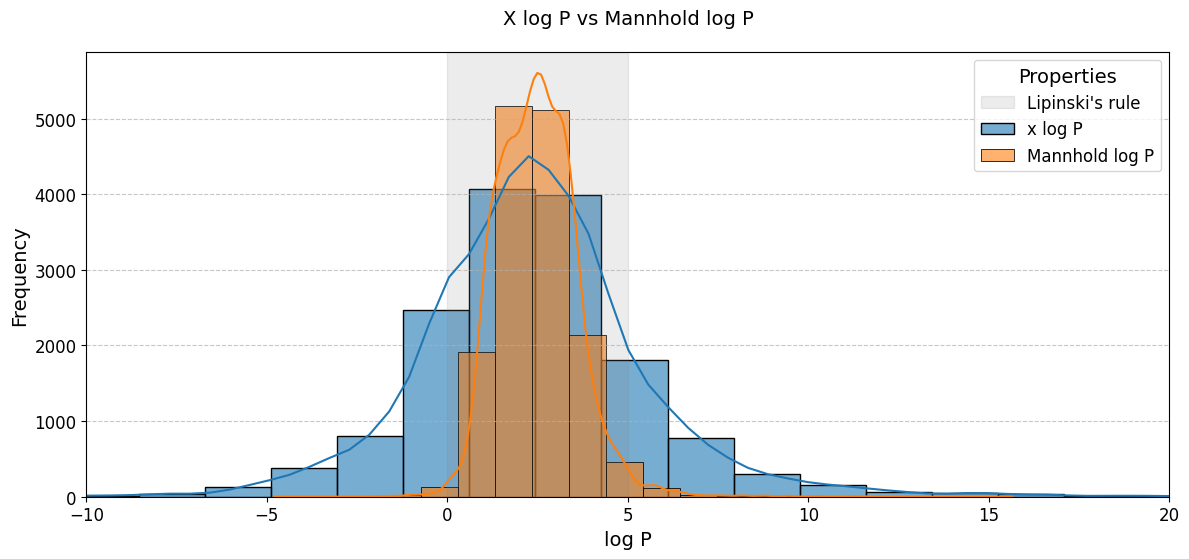

In [78]:
# Hydrophobicity histogram zoomed
plt.figure(figsize=(12, 6))

# Histogram for xlogp
sns.histplot(
    df['xlogp'], 
    kde=True, 
    bins=60, 
    color='#1f77b4',  # Blue
    label='x log P', 
    alpha=0.6
)

# Histogram for mannhold_logp
sns.histplot(
    df['mannhold_logp'], 
    kde=True, 
    bins=20, 
    color='#ff7f0e',  # Orange
    label='Mannhold log P', 
    alpha=0.6
)

# Lipinski's area
plt.axvspan(0, 5, color='gray', alpha=0.15, label="Lipinski's rule")

# Layout
plt.title("X log P vs Mannhold log P", fontsize=14, pad=20)
plt.xlabel("log P", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12, title="Properties", title_fontsize=14, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(-10, 20) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

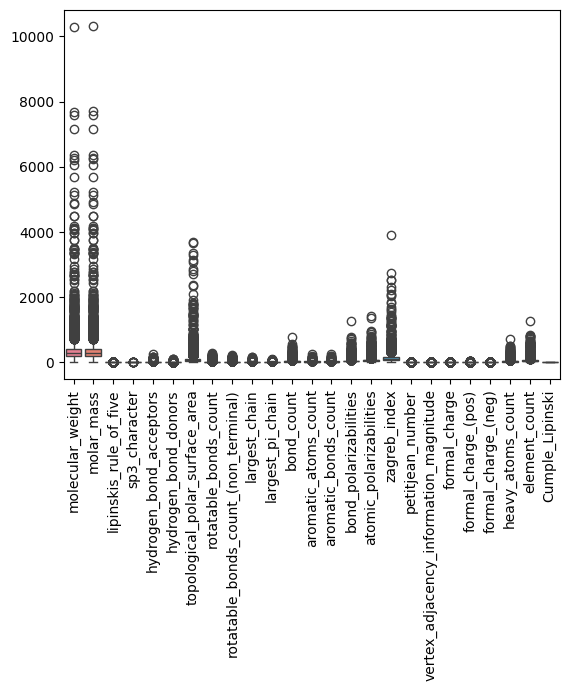

In [86]:
# Boxplot for outliers

sns.boxplot(data=df.drop(['eccentric_connectivity_index', 'fragment_complexity'], axis=1))
plt.xticks(rotation=90)
plt.show()

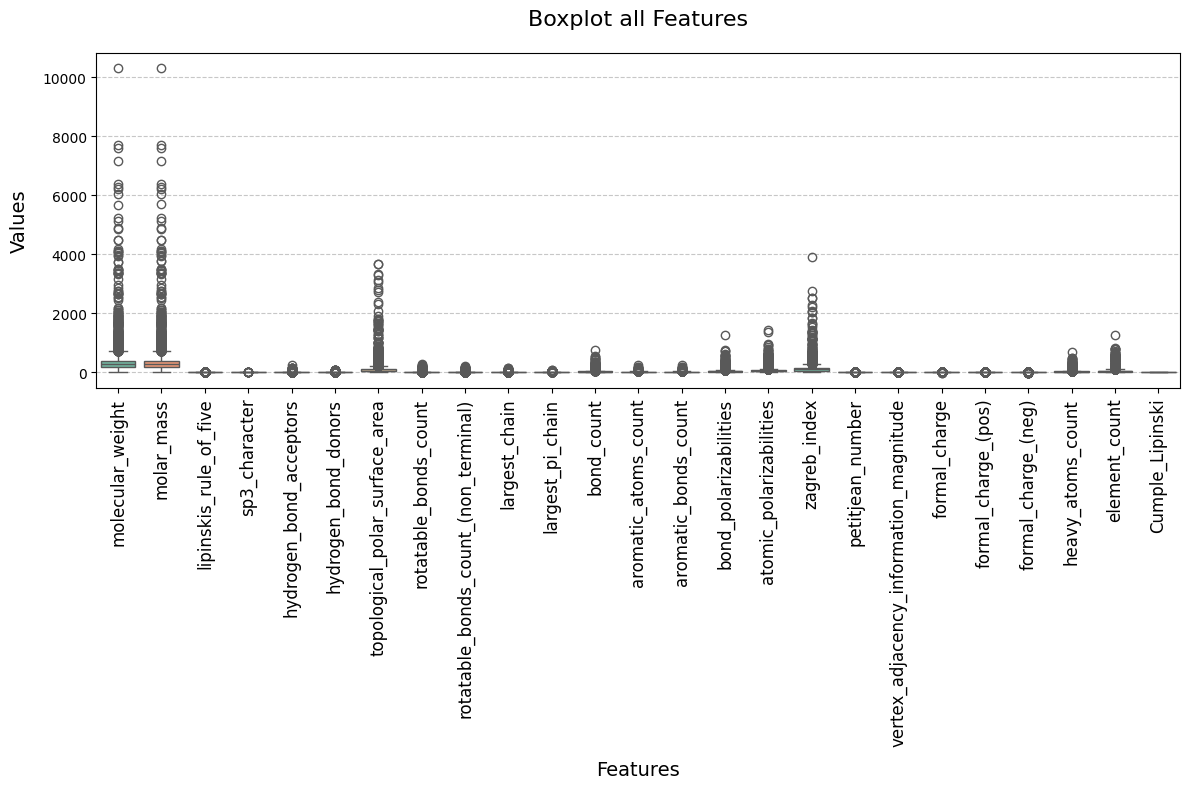

In [87]:
# Create the boxplot with dropped columns
plt.figure(figsize=(12, 8))  # Adjust figure size for readability
sns.boxplot(data=df.drop(['eccentric_connectivity_index', 'fragment_complexity'], axis=1), 
            palette='Set2')  # Change color palette

# Customize the plot
plt.title('Boxplot all Features', fontsize=16, pad=20)  # Add title
plt.xlabel('Features', fontsize=14, labelpad=10)  # Add x-axis label
plt.ylabel('Values', fontsize=14, labelpad=10)  # Add y-axis label
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels for better readability

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

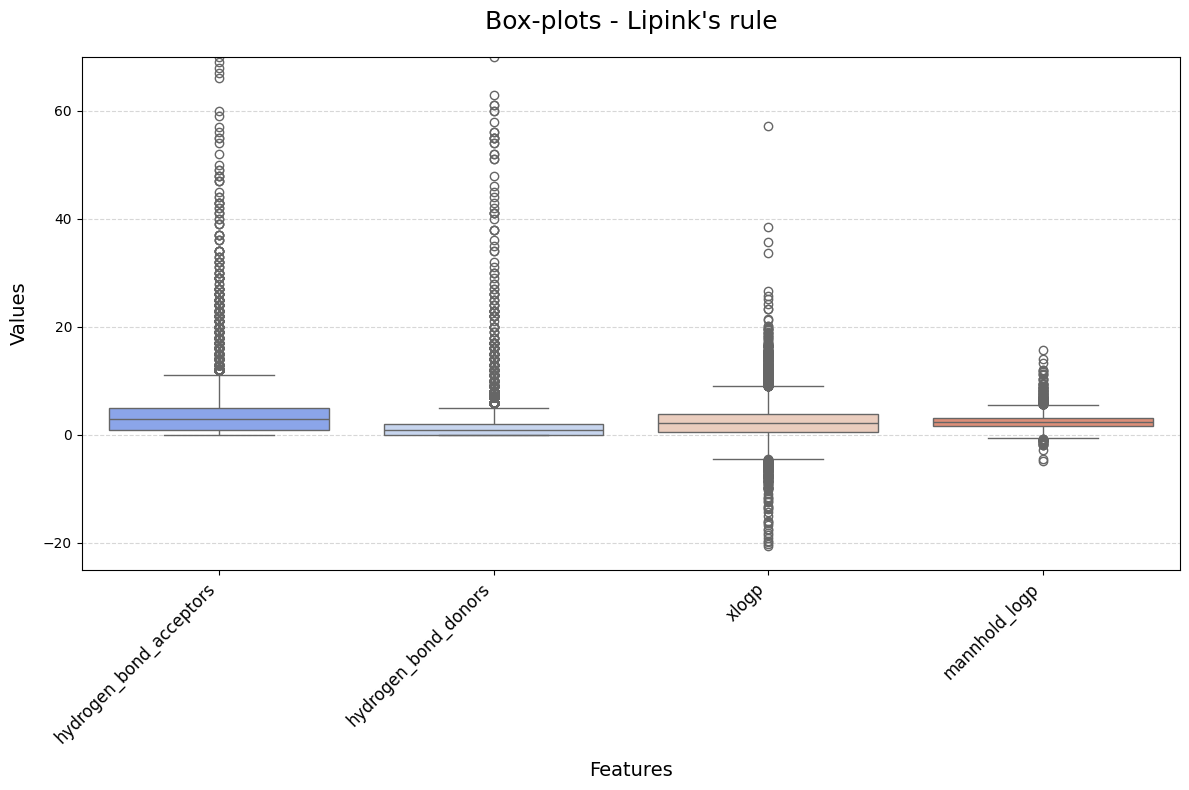

In [90]:
df = pd.read_csv('../Molecular-properties-prediction-for-drug-discovery/dataset_molecules/cleaned_data_properties.csv')

# Lipinski's boxplot
selected_columns = ['hydrogen_bond_acceptors', 'hydrogen_bond_donors', 'xlogp', 
                    'mannhold_logp']

# Adjust plot size
plt.figure(figsize=(12, 8))

# Create the boxplot with a refined palette
sns.boxplot(data=df[selected_columns], palette='coolwarm', showfliers=True)

# Customize the plot
plt.title("Box-plots - Lipink's rule", fontsize=18, pad=20)
plt.xlabel('Features', fontsize=14, labelpad=10)
plt.ylabel('Values', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12, ha='right')  # Rotate and align x-axis labels

# Set y-axis limit
plt.ylim(-25, 70)

# Add a grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Tighten layout
plt.tight_layout()

# Display the plot
plt.show()

In [79]:
#PCA to visualize the data and check outlier samples
#droping our target variables
df = df.drop(['xlogp', 'mannhold_logp'], axis=1)
# dropping non numerical columns
df = df.drop(['index', 'smiles_molecule', 'molecular_formula'], axis=1)


[0.52552697 0.10103784]


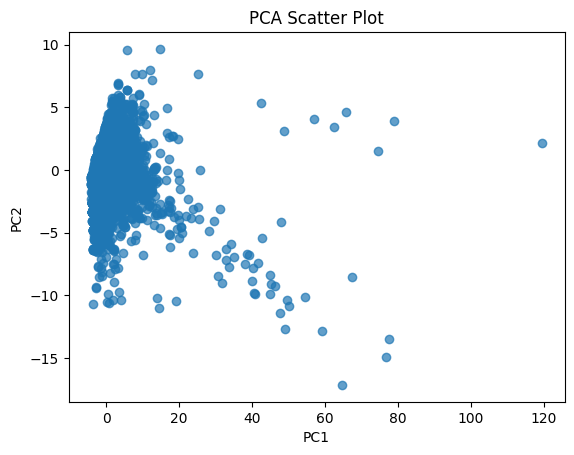

In [81]:
#PCA is sensible to data scales so we need to standardize somehow 
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)

# Plot PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot")
plt.show() 

In [82]:

explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

px.bar(explained_variance_ratio)

[0.52552697 0.10103784]


In [83]:
# Given explained variance ratio
explained_variance_ratio = [[0.53654543, 0.10474033]]

# Calculate cumulative variance
cumulative_variance = np.sum(explained_variance_ratio)

# Print cumulative variance
print(f"Cumulative Variance: {cumulative_variance:.2f}")

Cumulative Variance: 0.64


In [84]:
# Identify outliers using Mahalanobis distance

# Compute the covariance matrix of the PCA components
cov_matrix = np.cov(X_pca, rowvar=False)
mean_vec = np.mean(X_pca, axis=0)

# Compute Mahalanobis distance
distances = []
for x in X_pca:
    diff = x - mean_vec
    md = np.sqrt(diff.T @ np.linalg.inv(cov_matrix) @ diff)
    distances.append(md)

# Set threshold for outliers (95% confidence interval)
threshold = chi2.ppf(0.95, df=2)

# Identify outliers
outliers = np.where(np.array(distances) > threshold)[0]

print("Outliers:", outliers)

Outliers: [  346   593   594   622   631   887  1074  1198  1378  1432  1831  2379
  2421  2743  2852  2890  3235  3443  3981  4080  4225  4255  4674  4822
  5535  6126  6315  6331  6718  6768  7339  7342  7611  7691  7723  7742
  7752  7754  9257  9259 10418 10497 10794 10882 11344 11615 11997 12110
 12193 12203 12578 12857 13111 13113 13627 13640 13775 13776 13989 14177
 14234 14743 14749 14875 14975 14976]


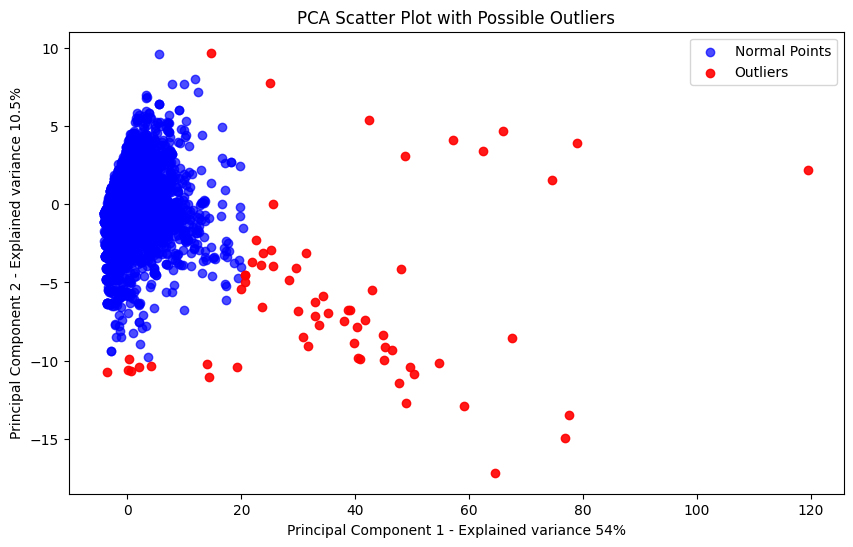

In [85]:

# Calculate distances (for simplicity, assume Mahalanobis distance is the distance from (0,0))
# Compute Mahalanobis distance
distances = []
for x in X_pca:
    diff = x - mean_vec
    md = np.sqrt(diff.T @ np.linalg.inv(cov_matrix) @ diff)
    distances.append(md)

# Set a threshold for outliers (95% confidence level for 2 dimensions)
threshold = chi2.ppf(0.95, df=2)  # 99% confidence level for 2 dimensions
outliers = distances > threshold  # Boolean array, True for outliers, False for normal points

# Separate the points into normal and outliers
X_outliers = X_pca[outliers]  # Outlier points
X_normal = X_pca[~outliers]    # Normal points

# Create a 2D scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot normal points (blue) and outliers (red)
ax.scatter(X_normal[:, 0], X_normal[:, 1], color='blue', alpha=0.7, label='Normal Points')
ax.scatter(X_outliers[:, 0], X_outliers[:, 1], color='red', alpha=0.9, label='Outliers')

# Add axis labels, title, and legend
ax.set_title("PCA Scatter Plot with Possible Outliers")
ax.set_xlabel("Principal Component 1 - Explained variance 54%")
ax.set_ylabel("Principal Component 2 - Explained variance 10.5%")

# Add legend for normal points and outliers
plt.legend()

# Show the plot
plt.show()